<a href="https://colab.research.google.com/github/eyang16/ECGR_4105_ML_Fall_2025/blob/main/ECGR_4105_ML_HW2_Eyang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Homework 2
# Ethan Yang
# ID: 801250277
# ECGR_4105_Machine_Learning


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [11]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
# Replace current url with the one that links the D3.csv file from my own github rep. if that doesnt work find a way to connect it directly to a downloaded .csv file
url = 'https://raw.githubusercontent.com/eyang16/ECGR_4105_ML_Fall_2025/refs/heads/main/Homework_2/Housing.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [12]:
# Problem 1.a
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = df[features].values
y = df[target].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Loss function
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Gradient descent
def gradient_descent(X, y, X_val, y_val, lr=0.05, n_iters=500):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses = []
    val_losses = []

    for i in range(n_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= lr * gradients

        train_loss = compute_loss(X, y, theta)
        val_loss = compute_loss(X_val, y_val, theta)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


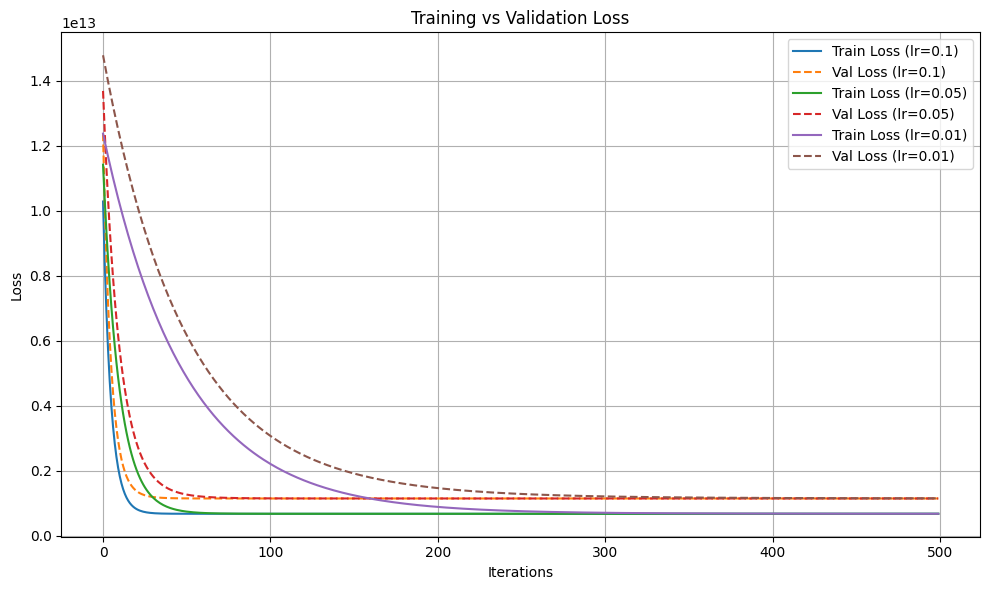

Best learning rate: 0.05
Best theta: [4744533.72677356  669669.63192986  111527.58401024  595247.08267141
  429101.8472739   290656.74997624]


In [13]:
learning_rates = [0.1, 0.05, 0.01]
best_theta = None
best_val_loss = float('inf')
best_lr = None

plt.figure(figsize=(10,6))

for lr in learning_rates:
    theta, train_losses, val_losses = gradient_descent(X_train, y_train, X_val, y_val, lr=lr, n_iters=500)
    plt.plot(train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(val_losses, label=f'Val Loss (lr={lr})', linestyle='--')

    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_theta = theta
        best_lr = lr

plt.title("Training vs Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Best learning rate: {best_lr}")
print(f"Best theta: {best_theta}")

Best learning rate (full model): 0.05
Best theta (full model): [3676571.48418433  507833.30198508   61207.9810817   557350.82236283
  364929.72522268  498044.38832272  242595.62004985  440619.78467125
  687702.03318785  814233.75479129  209353.59089292  624131.46501812]
Final validation MSE (full model): 899892091754.50
Final validation RMSE (full model): 1341560.35


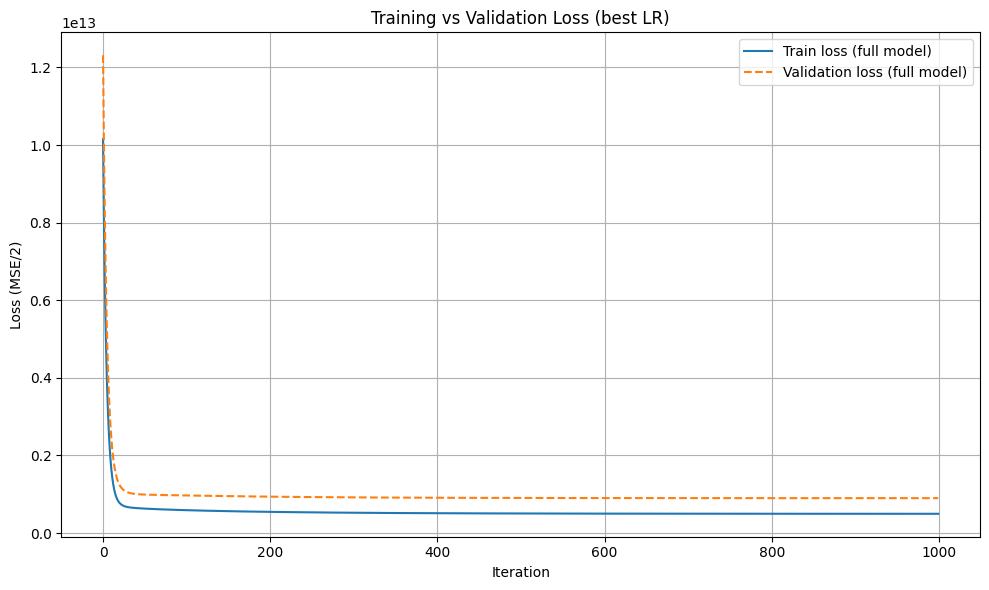


 Comparison against Problem 1a
Best learning rate (simple model): 0.01
Best theta (simple model): [4744198.73296083  669616.04384032  113163.60918978  593866.42570457
  428455.45908016  290852.52053471]
Final validation MSE (simple model): 1146310524675.41
Final validation RMSE (simple model): 1514140.37

Validation RMSE — full vs simple: 1341560.35 vs 1514140.37


In [14]:
# Problem 1.b
# Ensure consistent lowercase column names
df.columns = [c.strip().lower() for c in df.columns]

all_features = [
    'area', 'bedrooms', 'bathrooms', 'stories',
    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
    'airconditioning', 'parking', 'prefarea'
]
target_col = 'price'

# Encode binary categorical features (yes/no -> 1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    if df[col].dtype == object:
        df[col] = df[col].str.strip().str.lower().map({'yes': 1, 'no': 0})
    df[col] = df[col].astype(int)

# Split continuous vs binary
continuous_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Extract X, y
X_full = df[all_features].copy()
y = df[target_col].values.astype(float)

# Standardize continuous features only
scaler = StandardScaler()
X_full[continuous_cols] = scaler.fit_transform(X_full[continuous_cols])

# Add bias term
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

# Train/validation split (fixed seed for reproducibility)
X_train_df, X_val_df, y_train, y_val = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train = add_bias(X_train_df.values)
X_val = add_bias(X_val_df.values)

# Gradient descent

def compute_loss(X, y, theta):
    m = len(y)
    preds = X.dot(theta)
    errors = preds - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

def gradient_descent(X, y, X_val, y_val, lr=0.05, n_iters=1000):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses = []
    val_losses = []

    for i in range(n_iters):
        preds = X.dot(theta)
        errors = preds - y
        grad = (1 / m) * X.T.dot(errors)
        theta -= lr * grad

        train_losses.append(compute_loss(X, y, theta))
        val_losses.append(compute_loss(X_val, y_val, theta))

    return theta, train_losses, val_losses

def rmse(X, y, theta):
    preds = X.dot(theta)
    return np.sqrt(np.mean((preds - y) ** 2))

# LR sweep and selection
learning_rates = [0.1, 0.05, 0.02, 0.01]
best = {'lr': None, 'theta': None, 'train_losses': None, 'val_losses': None, 'final_val_loss': np.inf}

for lr in learning_rates:
    theta, train_losses, val_losses = gradient_descent(X_train, y_train, X_val, y_val, lr=lr, n_iters=1000)
    if val_losses[-1] < best['final_val_loss']:
        best.update({
            'lr': lr,
            'theta': theta,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'final_val_loss': val_losses[-1]
        })

print(f"Best learning rate (full model): {best['lr']}")
print(f"Best theta (full model): {best['theta']}")
print(f"Final validation MSE (full model): {best['final_val_loss']:.2f}")
print(f"Final validation RMSE (full model): {np.sqrt(best['final_val_loss']*2):.2f}")  # RMSE from MSE/2 formulation

# Plot losses (best LR only)
plt.figure(figsize=(10,6))
plt.plot(best['train_losses'], label='Train loss (full model)')
plt.plot(best['val_losses'], label='Validation loss (full model)', linestyle='--')
plt.title('Training vs Validation Loss (best LR)')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE/2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparison with Problem 1a
# Simpler feature set: area, bedrooms, bathrooms, stories, parking
simple_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_simple_df = df[simple_features].copy()
X_simple_df[simple_features] = scaler.fit_transform(df[simple_features])  # re-fit scaler to simple set

X_train_s_df, X_val_s_df, y_train_s, y_val_s = train_test_split(X_simple_df, y, test_size=0.2, random_state=42)
X_train_s = add_bias(X_train_s_df.values)
X_val_s = add_bias(X_val_s_df.values)

# Sweep the same LRs for the simple model
best_s = {'lr': None, 'theta': None, 'train_losses': None, 'val_losses': None, 'final_val_loss': np.inf}
for lr in learning_rates:
    theta_s, train_losses_s, val_losses_s = gradient_descent(X_train_s, y_train_s, X_val_s, y_val_s, lr=lr, n_iters=1000)
    if val_losses_s[-1] < best_s['final_val_loss']:
        best_s.update({
            'lr': lr,
            'theta': theta_s,
            'train_losses': train_losses_s,
            'val_losses': val_losses_s,
            'final_val_loss': val_losses_s[-1]
        })

print("\n Comparison against Problem 1a")
print(f"Best learning rate (simple model): {best_s['lr']}")
print(f"Best theta (simple model): {best_s['theta']}")
print(f"Final validation MSE (simple model): {best_s['final_val_loss']:.2f}")
print(f"Final validation RMSE (simple model): {np.sqrt(best_s['final_val_loss']*2):.2f}")

# Side-by-side RMSE summary
rmse_full = np.sqrt(best['final_val_loss']*2)
rmse_simple = np.sqrt(best_s['final_val_loss']*2)
print(f"\nValidation RMSE — full vs simple: {rmse_full:.2f} vs {rmse_simple:.2f}")

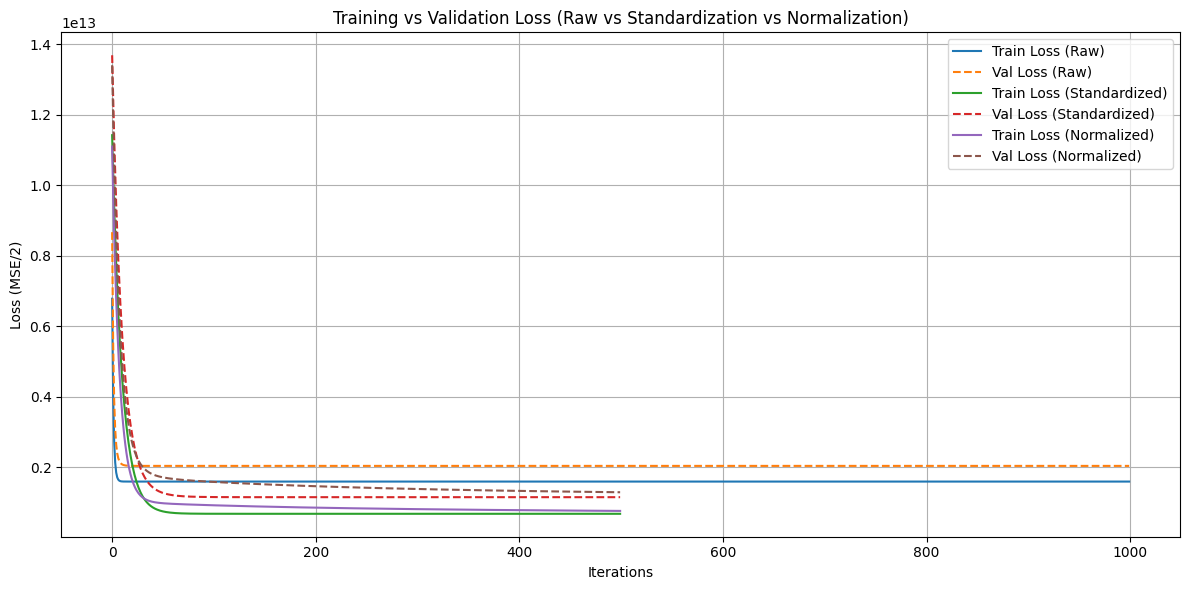

Baseline (Raw) RMSE: 2016945.8134251274
Standardized RMSE: 1514173.5448705673
Normalized RMSE: 1603860.0647933006


In [15]:
# Problem 2.a
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X_raw = df[features].values.astype(float)
y = df[target].values.astype(float)

# Helper functions

def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

def compute_loss(X, y, theta):
    m = len(y)
    preds = X.dot(theta)
    return (1/(2*m)) * np.sum((preds - y)**2)

def gradient_descent(X, y, X_val, y_val, lr=0.05, n_iters=500):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []
    for i in range(n_iters):
        preds = X.dot(theta)
        errors = preds - y
        grad = (1/m) * X.T.dot(errors)
        theta -= lr * grad
        train_losses.append(compute_loss(X, y, theta))
        val_losses.append(compute_loss(X_val, y_val, theta))
    return theta, train_losses, val_losses

def rmse(X, y, theta):
    preds = X.dot(theta)
    return np.sqrt(np.mean((preds - y)**2))

# Train baseline (raw inputs)

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_raw, y, test_size=0.2, random_state=42)
X_train_raw_b, X_val_raw_b = add_bias(X_train_raw), add_bias(X_val_raw)

#theta_raw, train_losses_raw, val_losses_raw = gradient_descent(X_train_raw_b, y_train, X_val_raw_b, y_val, lr=0.01, n_iters=500)
theta_raw, train_losses_raw, val_losses_raw = gradient_descent(X_train_raw_b, y_train, X_val_raw_b, y_val, lr=1e-8, n_iters=1000)

# Train with Standardization

scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_raw)
X_train_std, X_val_std, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_std_b, X_val_std_b = add_bias(X_train_std), add_bias(X_val_std)

theta_std, train_losses_std, val_losses_std = gradient_descent(X_train_std_b, y_train, X_val_std_b, y_val, lr=0.05, n_iters=500)

# Train with Normalization

scaler_norm = MinMaxScaler()
X_norm = scaler_norm.fit_transform(X_raw)
X_train_norm, X_val_norm, y_train, y_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train_norm_b, X_val_norm_b = add_bias(X_train_norm), add_bias(X_val_norm)

theta_norm, train_losses_norm, val_losses_norm = gradient_descent(X_train_norm_b, y_train, X_val_norm_b, y_val, lr=0.05, n_iters=500)

# Plot comparison

plt.figure(figsize=(12,6))

plt.plot(train_losses_raw, label='Train Loss (Raw)')
plt.plot(val_losses_raw, label='Val Loss (Raw)', linestyle='--')

plt.plot(train_losses_std, label='Train Loss (Standardized)')
plt.plot(val_losses_std, label='Val Loss (Standardized)', linestyle='--')

plt.plot(train_losses_norm, label='Train Loss (Normalized)')
plt.plot(val_losses_norm, label='Val Loss (Normalized)', linestyle='--')

plt.title("Training vs Validation Loss (Raw vs Standardization vs Normalization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE/2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Report RMSE

print("Baseline (Raw) RMSE:", rmse(X_val_raw_b, y_val, theta_raw))
print("Standardized RMSE:", rmse(X_val_std_b, y_val, theta_std))
print("Normalized RMSE:", rmse(X_val_norm_b, y_val, theta_norm))


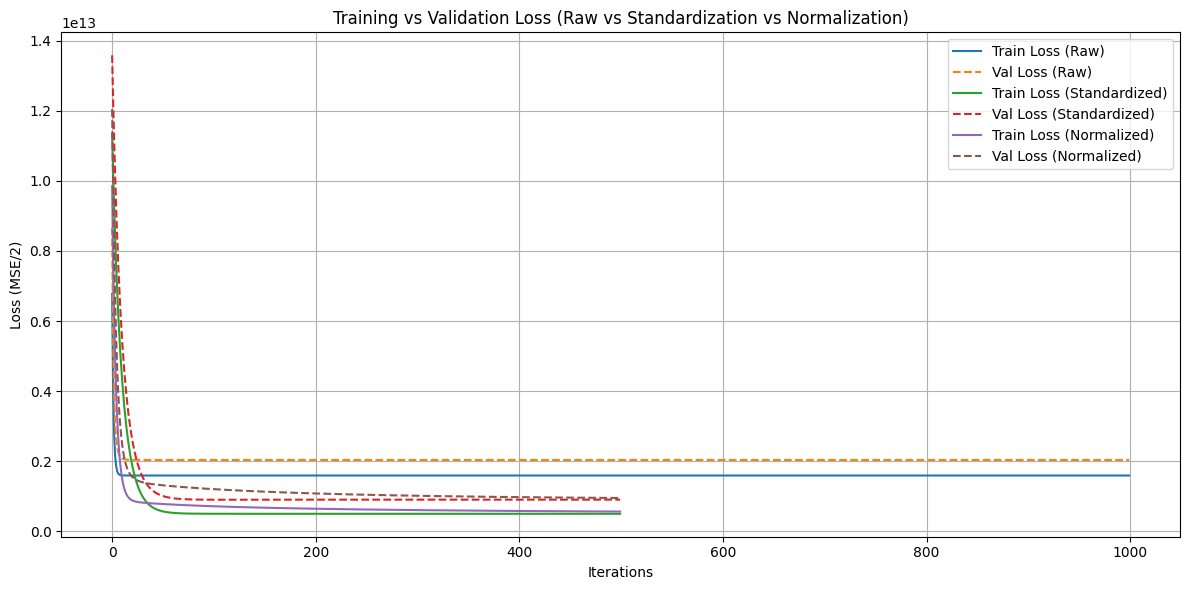

Baseline (Raw) RMSE: 2016944.3536806467
Standardized RMSE: 1341936.2775152992
Normalized RMSE: 1376370.6571121642


In [16]:
# Problem 2.b
# Lowercase column names for consistency
df.columns = [c.strip().lower() for c in df.columns]

features = [
    'area','bedrooms','bathrooms','stories',
    'mainroad','guestroom','basement','hotwaterheating',
    'airconditioning','parking','prefarea'
]
target = 'price'

# Encode binary categorical features (yes/no → 1/0)
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in binary_cols:
    if df[col].dtype == object:
        df[col] = df[col].str.strip().str.lower().map({'yes':1,'no':0})
    df[col] = df[col].astype(int)

X_raw = df[features].values.astype(float)
y = df[target].values.astype(float)

# Helper functions
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

def compute_loss(X, y, theta):
    m = len(y)
    preds = X.dot(theta)
    errors = preds - y
    return (1/(2*m)) * np.dot(errors, errors)

def gradient_descent(X, y, X_val, y_val, lr=0.05, n_iters=500):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []
    for i in range(n_iters):
        preds = X.dot(theta)
        errors = preds - y
        grad = (1/m) * X.T.dot(errors)
        theta -= lr * grad
        train_losses.append(compute_loss(X, y, theta))
        val_losses.append(compute_loss(X_val, y_val, theta))
    return theta, train_losses, val_losses

def rmse(X, y, theta):
    preds = X.dot(theta)
    return np.sqrt(np.mean((preds - y)**2))

# Raw inputs
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_raw, y, test_size=0.2, random_state=42)
X_train_raw_b, X_val_raw_b = add_bias(X_train_raw), add_bias(X_val_raw)

theta_raw, train_losses_raw, val_losses_raw = gradient_descent(X_train_raw_b, y_train, X_val_raw_b, y_val, lr=1e-8, n_iters=1000)

# Standardization
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_raw)
X_train_std, X_val_std, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_std_b, X_val_std_b = add_bias(X_train_std), add_bias(X_val_std)

theta_std, train_losses_std, val_losses_std = gradient_descent(X_train_std_b, y_train, X_val_std_b, y_val, lr=0.05, n_iters=500)

# Normalization
scaler_norm = MinMaxScaler()
X_norm = scaler_norm.fit_transform(X_raw)
X_train_norm, X_val_norm, y_train, y_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)
X_train_norm_b, X_val_norm_b = add_bias(X_train_norm), add_bias(X_val_norm)

theta_norm, train_losses_norm, val_losses_norm = gradient_descent(X_train_norm_b, y_train, X_val_norm_b, y_val, lr=0.05, n_iters=500)

# Plot comparison
plt.figure(figsize=(12,6))

plt.plot(train_losses_raw, label='Train Loss (Raw)')
plt.plot(val_losses_raw, label='Val Loss (Raw)', linestyle='--')

plt.plot(train_losses_std, label='Train Loss (Standardized)')
plt.plot(val_losses_std, label='Val Loss (Standardized)', linestyle='--')

plt.plot(train_losses_norm, label='Train Loss (Normalized)')
plt.plot(val_losses_norm, label='Val Loss (Normalized)', linestyle='--')

plt.title("Training vs Validation Loss (Raw vs Standardization vs Normalization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE/2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Report RMSE
print("Baseline (Raw) RMSE:", rmse(X_val_raw_b, y_val, theta_raw))
print("Standardized RMSE:", rmse(X_val_std_b, y_val, theta_std))
print("Normalized RMSE:", rmse(X_val_norm_b, y_val, theta_norm))

Best lambda: 0.0
Best theta: [4744533.74907449  669669.62933034  111527.30102236  595247.30781532
  429101.96588984  290656.73479686]
Final validation loss (unregularized): 1146360772862.68
Validation RMSE (unregularized): 1514173.55


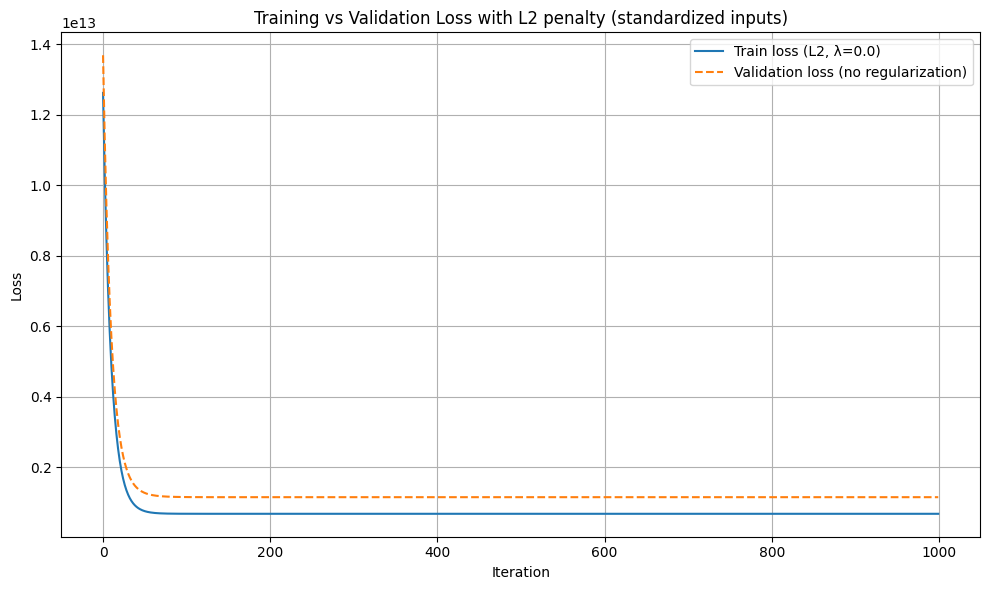

In [17]:
# Problem 3.a
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X_raw = df[features].values.astype(float)
y = df[target].values.astype(float)

# Best scaling approach: Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X_raw)

def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_b, X_val_b = add_bias(X_train), add_bias(X_val)

# Losses and metrics
def compute_loss_eval(X, y, theta):
    m = len(y)
    preds = X.dot(theta)
    errors = preds - y
    return (1/(2*m)) * np.dot(errors, errors)

def compute_rmse(X, y, theta):
    preds = X.dot(theta)
    return np.sqrt(np.mean((preds - y)**2))

# Gradient descent with L2 regularization on training only
# Regularize theta[1:] (exclude bias term)
def gradient_descent_l2(X, y, X_val, y_val, lr=0.05, n_iters=1000, lam=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses = []
    val_losses = []

    for i in range(n_iters):
        preds = X.dot(theta)
        errors = preds - y

        # Gradient of unregularized loss
        grad = (1/m) * X.T.dot(errors)

        # L2 penalty gradient (exclude bias term)
        reg = np.zeros_like(theta)
        reg[1:] = (lam / m) * theta[1:]

        # Update
        theta -= lr * (grad + reg)

        # Training loss WITH L2 penalty (for tracking)
        l2_term = (lam/(2*m)) * np.dot(theta[1:], theta[1:])
        train_loss = (1/(2*m)) * np.dot(errors, errors) + l2_term

        # Validation loss WITHOUT L2 penalty (as requested)
        val_loss = compute_loss_eval(X_val, y_val, theta)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# Sweep regularization strengths; choose best by final validation loss
learning_rate = 0.05
lambdas = [0.0, 0.001, 0.01, 0.1]
best = {'lam': None, 'theta': None, 'train_losses': None, 'val_losses': None, 'final_val_loss': np.inf}

for lam in lambdas:
    theta, train_losses, val_losses = gradient_descent_l2(
        X_train_b, y_train, X_val_b, y_val, lr=learning_rate, n_iters=1000, lam=lam
    )
    if val_losses[-1] < best['final_val_loss']:
        best.update({'lam': lam, 'theta': theta, 'train_losses': train_losses, 'val_losses': val_losses,
                     'final_val_loss': val_losses[-1]})

print(f"Best lambda: {best['lam']}")
print(f"Best theta: {best['theta']}")
print(f"Final validation loss (unregularized): {best['final_val_loss']:.2f}")
print(f"Validation RMSE (unregularized): {compute_rmse(X_val_b, y_val, best['theta']):.2f}")

# Plot training (regularized) vs validation (unregularized) losses for best lambda
plt.figure(figsize=(10,6))
plt.plot(best['train_losses'], label=f'Train loss (L2, λ={best["lam"]})')
plt.plot(best['val_losses'], label='Validation loss (no regularization)', linestyle='--')
plt.title('Training vs Validation Loss with L2 penalty (standardized inputs)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

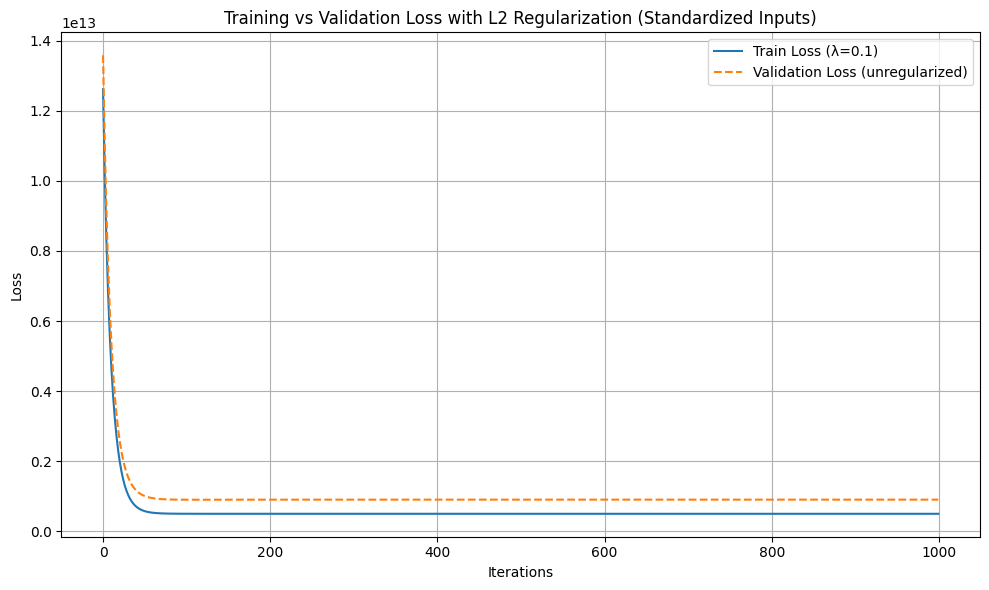

Best lambda: 0.1
Validation RMSE: 1341955.52


In [18]:
# Problem 3.b
df.columns = [c.strip().lower() for c in df.columns]

features = [
    'area','bedrooms','bathrooms','stories',
    'mainroad','guestroom','basement','hotwaterheating',
    'airconditioning','parking','prefarea'
]
target = 'price'

binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in binary_cols:
    if df[col].dtype == object or pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.strip().str.lower().map({'yes': 1, 'no': 0})
    df[col] = df[col].fillna(0).astype(int)

X_raw = df[features].values.astype(float)
y = df[target].values.astype(float)

# Standardize inputs
scaler = StandardScaler()
X_std = scaler.fit_transform(X_raw)

def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=42)
X_train_b, X_val_b = add_bias(X_train), add_bias(X_val)

# Loss functions
def compute_loss_eval(X, y, theta):
    m = len(y)
    preds = X.dot(theta)
    return (1/(2*m)) * np.dot(preds - y, preds - y)

def compute_rmse(X, y, theta):
    preds = X.dot(theta)
    return np.sqrt(np.mean((preds - y)**2))

# Gradient descent with L2 regularization
def gradient_descent_l2(X, y, X_val, y_val, lr=0.05, n_iters=1000, lam=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []

    for i in range(n_iters):
        preds = X.dot(theta)
        errors = preds - y
        grad = (1/m) * X.T.dot(errors)
        reg = np.zeros_like(theta)
        reg[1:] = (lam/m) * theta[1:]
        theta -= lr * (grad + reg)

        l2_term = (lam/(2*m)) * np.dot(theta[1:], theta[1:])
        train_loss = (1/(2*m)) * np.dot(errors, errors) + l2_term
        val_loss = compute_loss_eval(X_val, y_val, theta)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses

# Sweep lambda values
lambdas = [0.0, 0.001, 0.01, 0.1]
best = {'lam': None, 'theta': None, 'train_losses': None, 'val_losses': None, 'final_val_loss': np.inf}

for lam in lambdas:
    theta, train_losses, val_losses = gradient_descent_l2(X_train_b, y_train, X_val_b, y_val, lr=0.05, n_iters=1000, lam=lam)
    if val_losses[-1] < best['final_val_loss']:
        best.update({'lam': lam, 'theta': theta, 'train_losses': train_losses, 'val_losses': val_losses})

# Plot results
plt.figure(figsize=(10,6))
plt.plot(best['train_losses'], label=f'Train Loss (λ={best["lam"]})')
plt.plot(best['val_losses'], label='Validation Loss (unregularized)', linestyle='--')
plt.title('Training vs Validation Loss with L2 Regularization (Standardized Inputs)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Report
print(f"Best lambda: {best['lam']}")
print(f"Validation RMSE: {compute_rmse(X_val_b, y_val, best['theta']):.2f}")